### Naive Bayes Classifier: Overview

#### 1. **Introduction to Naive Bayes**
Naive Bayes is a simple yet powerful classification algorithm based on Bayes' theorem with an assumption of independence between features. Despite its simplicity, it often performs surprisingly well in practice, especially in text classification and spam filtering.

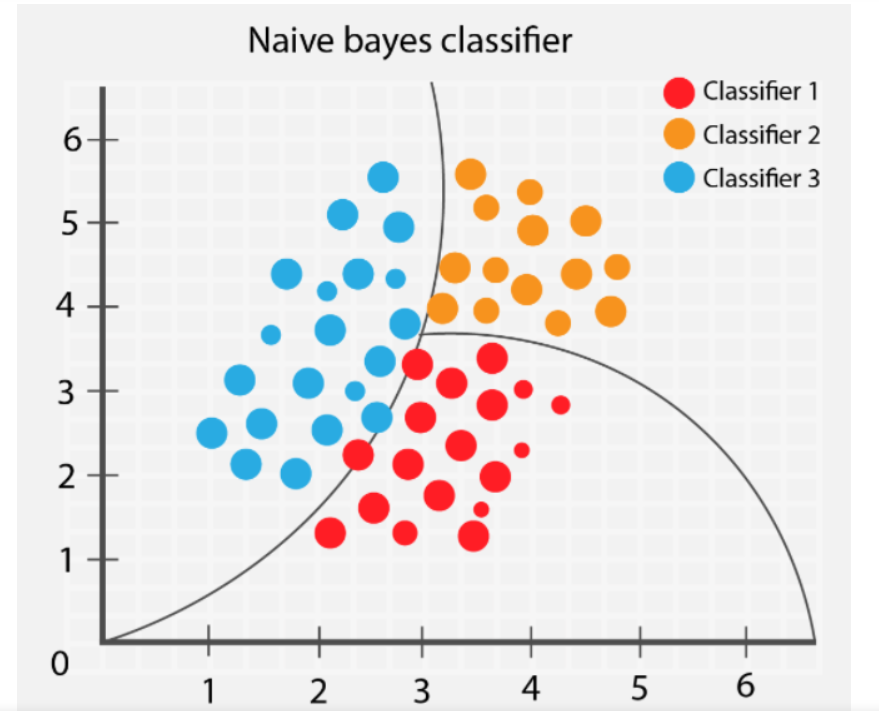

#### 2. **Bayes' Theorem**
At its core, Naive Bayes relies on Bayes' theorem, which calculates the probability of a hypothesis (class label) given the evidence (features). It is expressed as:
\$ P(Y|X) = \frac{P(X|Y) \cdot P(Y)}{P(X)} \$

- \( P(Y|X) \) is the posterior probability of class \( Y \) given predictor \( X \).
- \( P(X|Y) \) is the likelihood of predictor \( X \) given class \( Y \).
- \( P(Y) \) is the prior probability of class \( Y \).
- \( P(X) \) is the prior probability of predictor \( X \).

#### 3. **Independence Assumption**
The "naive" in Naive Bayes comes from the assumption that all features are independent of each other given the class label. This simplifies the computation and makes the algorithm computationally efficient.

\$ P(X_1, X_2, ..., X_n | Y) = P(X_1|Y) \cdot P(X_2|Y) \cdot ... \cdot P(X_n|Y) \$

#### 4. **Types of Naive Bayes**
- **Gaussian Naive Bayes**: Assumes that features follow a normal distribution.
- **Multinomial Naive Bayes**: Suitable for classification with discrete features (e.g., word counts for text classification).
- **Bernoulli Naive Bayes**: Appropriate when features are binary (e.g., presence or absence of a word in text).

#### 5. **Training a Naive Bayes Classifier**
- **Parameter Estimation**: Involves calculating prior probabilities \( P(Y) \) and likelihoods \( P(X|Y) \) from the training data.
- **Smoothing**: To handle cases where a particular feature value occurs in the test data but not in the training data.

#### 6. **Prediction with Naive Bayes**
Given a new instance \( X_{\text{new}} \), the class label is predicted by selecting the class with the highest posterior probability.

\$ \hat{y} = \text{argmax}_{y \in \{Y_1, Y_2, ..., Y_k\}} P(Y_i) \cdot \prod_{j=1}^{n} P(X_{\text{new}_j} | Y_i) \$

#### 7. **Advantages of Naive Bayes**
- **Efficiency**: Computationally efficient and requires a small amount of training data.
- **Ease of Interpretation**: Simple and easy to implement.
- **Can Handle Large Feature Spaces**: Performs well even with a large number of features.
- **Robust to Irrelevant Features**: Ignores irrelevant features.

#### 8. **Disadvantages of Naive Bayes**
- **Assumption of Independence**: The independence assumption may not hold in real-world data.
- **Sensitivity to Feature Distribution**: Gaussian Naive Bayes may not perform well with features that do not follow a normal distribution.
- **Lack of Probabilistic Interpretation**: Predictions are not probabilities in the strict sense.

#### 9. **Applications of Naive Bayes**
- **Text Classification**: Spam filtering, sentiment analysis, document categorization.
- **Recommendation Systems**: Personalized recommendations based on user preferences.
- **Medical Diagnosis**: Predicting diseases based on symptoms.
- **Customer Segmentation**: Identifying customer segments based on demographic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We'll use only the first two features for visualization
y = iris.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

In [5]:
# Train the classifier
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [6]:
# Predict on the test data
y_pred = nb_classifier.predict(X_test)

In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8222222222222222


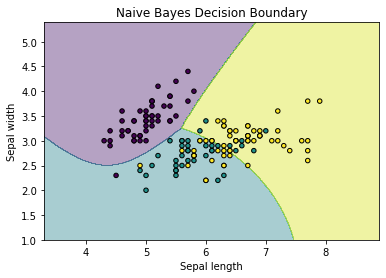

In [8]:
# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = nb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Naive Bayes Decision Boundary')
plt.show()